<a href="https://colab.research.google.com/github/fosky1/data-science-experiments/blob/main/Impact_score_Radon_transform_microlocal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


df = pd.read_csv('database-radon transform.csv')
df.head()

,Scopus Author ID,Name,Latest Affilation,Latest Affiliation Country,Latest Affiliation Scopus Organization ID,Number of matching documents,Total citations,Total documents,h-index,First publication year
0,56956477300,"Webber, James W.","Department of Obstetrics, Gynecology and Repro...",United States,103863977,6,113,22,7,2016
1,7004041143,"Quinto, Eric Todd",Tufts University,United States,60023143,5,1490,66,21,1980
2,7006570038,"Chihara, Hiroyuki",College of Education,Japan,108201281,2,154,21,7,1996
3,35102289500,"Holman, Sean F.",Department of Mathematics,United Kingdom,105489649,2,197,24,9,2009
4,36162452300,"Rosenblatt, Mariel",Universidad Nacional de General Sarmiento,Argentina,60006692,1,31,5,3,2010


In [ ]:
# number of active years
current_year = datetime.now().year
df['Active_years'] = current_year - df['First publication year'] +1

# citations per document
df['Citations_per_doc'] = df['Total citations'] / df['Total documents']

# productivity per year
df['Productivity_per_year'] = df['Total documents'] / df['Active_years']

# h-index normalized per year
df['H-index_normalized'] = df['h-index'] / df['Active_years']

#
print(df[['Name', 'Citations_per_doc','Productivity_per_year','H-index_normalized']].head())

                 Name  Citations_per_doc  Productivity_per_year  \
0    Webber, James W.           5.136364               2.200000   
1   Quinto, Eric Todd          22.575758               1.434783   
2   Chihara, Hiroyuki           7.333333               0.700000   
3     Holman, Sean F.           8.208333               1.411765   
4  Rosenblatt, Mariel           6.200000               0.312500   

   H-index_normalized  
0            0.700000  
1            0.456522  
2            0.233333  
3            0.529412  
4            0.187500  


In [ ]:
def impact_factor(row):
  # avoid division by zero
  if row['Total documents']==0:
    return 0
  citations_per_doc = row['Total citations'] / row['Total documents']
  return citations_per_doc * row['h-index']

df['Impact_Score'] = df.apply(impact_factor, axis=1)

df['Impact_Score_norm'] = df['Impact_Score'] / df['Active_years']

In [ ]:
df_sorted = df.sort_values(by='Impact_Score_norm', ascending=False)

df_sorted.head()

,Scopus Author ID,Name,Latest Affilation,Latest Affiliation Country,Latest Affiliation Scopus Organization ID,Number of matching documents,Total citations,Total documents,h-index,First publication year,Active_years,Citations_per_doc,Productivity_per_year,H-index_normalized,Impact_Score,Impact_Score_norm
23,6603116420,"Kutyniok, Gitta",Ludwig-Maximilians-Universität München,Germany,60028717,1,9514,194,39,1998,28,49.041237,6.928571,1.392857,1912.608247,68.307437
25,23989346800,"Öktem, Ozan",The Royal Institute of Technology (KTH),Sweden,60002014,1,2378,56,19,2007,19,42.464286,2.947368,1.000000,806.821429,42.464286
22,56553714600,"Petersen, Philipp Christian",Universität Wien,Austria,60025988,1,925,29,12,2015,11,31.896552,2.636364,1.090909,382.758621,34.796238
16,7404492648,"Miller, Eric L.",Tufts School of Engineering,United States,60137601,1,6773,269,43,1992,34,25.178439,7.911765,1.264706,1082.672862,31.843319
11,7004671570,"Stefanov, Plamen D.",Fakultät für Mathematik und Physik,Germany,60203671,1,2634,92,29,1988,38,28.630435,2.421053,0.763158,830.282609,21.849542


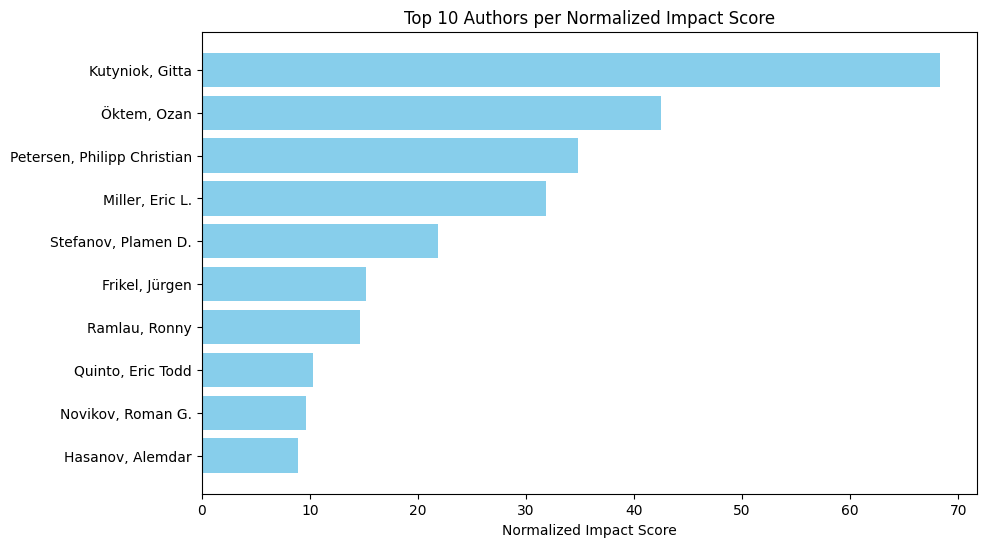

In [ ]:
top_10 = df_sorted.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10['Name'], top_10['Impact_Score_norm'], color='skyblue')
plt.xlabel('Normalized Impact Score')
plt.title('Top 10 Authors per Normalized Impact Score')
plt.gca().invert_yaxis() # put the first at the top
plt.show()
